In [6]:
#import usual python package
import numpy as np
import pandas as pd


In [7]:
import nltk

txt = 'In Brazil they drive on the right-hand side of the road. Has a large coastline on the eastern side of South America'

from nltk.tokenize import word_tokenize
token = word_tokenize(txt)
token

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'Has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

In [8]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist1 = fdist.most_common(10)
fdist1

[('the', 3),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('Brazil', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

<AxesSubplot:xlabel='key'>

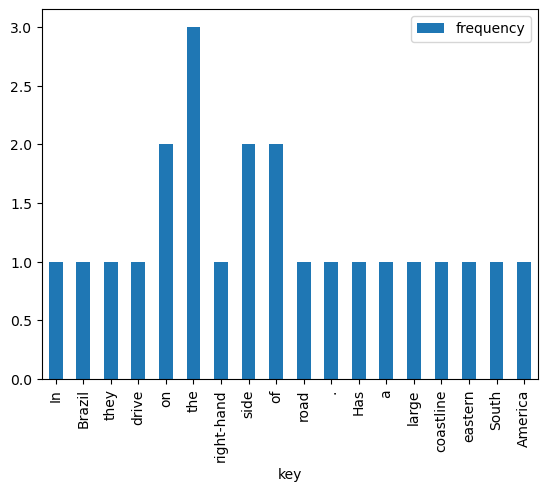

In [9]:
import pandas as pd
df_freq_tokens = pd.DataFrame.from_dict(FreqDist(token), orient='index')
df_freq_tokens.columns = ['frequency']
df_freq_tokens.index.name = 'key'
df_freq_tokens.plot(kind = 'bar')

In [10]:
from nltk import word_tokenize
from nltk.corpus import stopwords
a = set(stopwords.words('english'))
text = 'Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal.'

text1 = word_tokenize(text.lower())
print(text1)
stopwords = [x for x in text1 if x not in a]
print(stopwords)

['cristiano', 'ronaldo', 'was', 'born', 'on', 'february', '5', ',', '1985', ',', 'in', 'funchal', ',', 'madeira', ',', 'portugal', '.']
['cristiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchal', ',', 'madeira', ',', 'portugal', '.']


In [11]:
#contoh stemming di nltk
#lancaster
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import  SnowballStemmer

S = "Presumably i would like to MultiPly my provision, saying tHat without crYing"
print('Sentence: ',S)

stemmer_list = [LancasterStemmer,PorterStemmer,SnowballStemmer]
names = ['Lancaster','Porter','SnowBall']
for stemmer_name,stem in zip(names,stemmer_list):
    if stemmer_name == "SnowBall":
        st = stem("english")
    else:
        st = stem()
    print(stemmer_name,':',' '.join([st.stem(word) for word in S.split()]))
    


Sentence:  Presumably i would like to MultiPly my provision, saying tHat without crYing
Lancaster : presum i would lik to multiply my provision, say that without cry
Porter : presum i would like to multipli my provision, say that without cri
SnowBall : presum i would like to multipli my provision, say that without cri


In [12]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print('rocks :', lemmatizer.lemmatize('rocks'))
print('corpora :', lemmatizer.lemmatize('corpora'))

rocks : rock
corpora : corpus


In [13]:
from nltk import pos_tag
S = "i am currently learning NLP in English, but if possible to know NLP in indonesian language too"

token = word_tokenize(S)
print(pos_tag(token))

[('i', 'NN'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('possible', 'JJ'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('indonesian', 'JJ'), ('language', 'NN'), ('too', 'RB')]


In [14]:
from textblob import TextBlob

T = " Hello, Mr. Man. He smiled !! This, i.e that, is it"
sentence_tokens = TextBlob(T).sentences

#Tokenisasi Kata
print(TextBlob(T).words)

#Tokenisasi Kalimat
print([str(sent) for sent in sentence_tokens])

['Hello', 'Mr', 'Man', 'He', 'smiled', 'This', 'i.e', 'that', 'is', 'it']
[' Hello, Mr. Man.', 'He smiled !!', 'This, i.e that, is it']


In [15]:
#Contoh Textblob Stemming & Lemmatizer
from textblob import Word
#Stemming
print("Stem :", Word("running").stem())

#Lemmatizer
print("Lemmatize :", Word("went").lemmatize("v"))


Stem : run
Lemmatize : go


In [16]:
T = "Hello, Mr. Man. He smiled !! This, i.e that, is it"
for word, pos in TextBlob(T).tags:
    print(word, pos,end=", ")

Hello NNP, Mr. NNP, Man NNP, He PRP, smiled VBD, This DT, i.e NN, that IN, is VBZ, it PRP, 

In [17]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import  word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = 'Andi kerap melakukan transaksi rutin secara daring ataU online. Menurut andi belanja online lebih praktis'
stop = stopword.remove(kalimat.lower())
print(stop)

andi kerap melakukan transaksi rutin daring online. andi belanja online lebih praktis


In [18]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import  word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = 'Saya mengikuti pelajaran mata kuliah data mining II di kelas ini! :)'
stop = stopword.remove(kalimat.lower())
print(stop)

mengikuti pelajaran mata kuliah data mining ii kelas ini! :)


In [19]:
#Lemmatizer dengan Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

I = 'Saya mengikuti pelajaran mata kuliah data mining II di kelas ini! :)'
print(stemmer.stem(I))
print(stemmer.stem("Perayaan Bepergian Menyuarakan"))

saya ikut ajar mata kuliah data mining ii di kelas ini
raya pergi suara


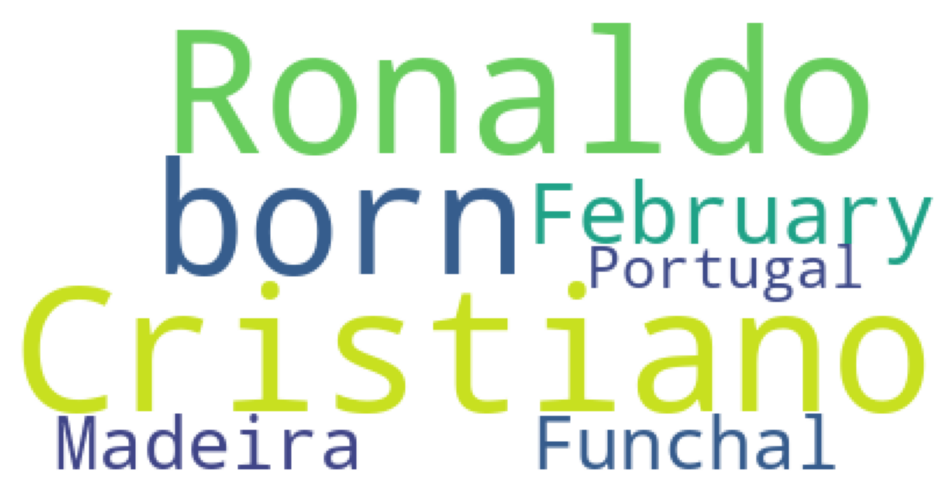

In [20]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white').generate(text)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis('off')
plt.show()

In [21]:
import pickle
import re
import os
from  nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords


stopwords = set(stopwords.words('english'))

stc_name = "20newsgroup.pckl"
src_path = os.path.join(os.getcwd(),stc_name)
with open(src_path,'rb') as fin:
    data = pickle.load(fin)

docs = [doc for doc in data.data]
label = data.target

def preprocess(doc):
    sents = word_tokenize(doc)
    sents_tok = list()
    sents = [t for t in sents if t not in stopwords]
    for s in sents:
        s = s.strip().lower()
        s = s.replace("\n"," ")
        s = re.sub(r'[^a-zA-Z0-9]',' ',s)
        s = re.sub(' +',' ',s)
        sents_tok.append(s)
    return " ".join(sents_tok)

docs_clear = list()
for d in docs:
    docs_clear.append(preprocess(d))

print("DONE!")


DONE!


In [22]:
# representasi vektor dengan VSM-TFIDF
from sklearn.feature_extraction. text import TfidfVectorizer
from sklearn import cluster
tfidf_vectorizer = TfidfVectorizer (max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print(X.shape)
k = 3
seed = 99 # Sembarang nilai untuk Random generator, mengapa penting? agar ketika dijalankan ulang nilai randomnya te km = cluster.KMeans (n_clusters=k, init=' random', max_iter=300, random_state = seed)
km = cluster.KMeans (n_clusters=k, init='random', max_iter=300, random_state = seed)
km.fit(X)
#Hasil clusteringnya
C_km =km.predict(X)
C_km [:10]


(1653, 10697)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:

kmPP= cluster.KMeans (n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = seed) 
kmPP.fit(X)
C_kmpp= kmPP.predict(X)
C_kmpp[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
import numpy as np
dbscan= cluster.DBSCAN (eps=0.5)
dbscan.fit(X)
C_db =dbscan. labels_.astype (int)
C_db [:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [25]:

from sklearn.metrics import silhouette_score as siluet 
C = [C_km, C_kmpp, C_db]
for res in C:
    print(siluet (X, res), end=', ')


0.01858467601596153, 0.01858467601596153, -0.23697800236118444, 

In [26]:
from sklearn.metrics.cluster import homogeneity_score as purity
for res in C:
    print(purity (label, res), end=', ')

0.06952188099464576, 0.06952188099464576, 0.0015549989772357536, 

In [27]:

# Evaluasi eksternal NMI
from sklearn.metrics import normalized_mutual_info_score as NMI
for res in C:
    print (NMI (label, res), end=', ')

0.10920145484701148, 0.10920145484701148, 0.002704356633566744, 

In [28]:
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Teks contoh dalam bahasa Inggris
text = "This is an example of text preprocessing using TextBlob and \n /n NLTK.  !? This technique _ is used to clean text from stopwords. :)"

# Tokenisasi (TextBlob)
blob = TextBlob(text)
filtered_blob = [word for word in blob.words if word.lower() not in stopwords.words('english')]

# Tokenisasi (NLTK)
tokens = word_tokenize(text)
filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]

# Hasil
print("TextBlob Result:")
print(filtered_blob)
print("\nNLTK Result:")
print(filtered_tokens)


TextBlob Result:
['example', 'text', 'preprocessing', 'using', 'TextBlob', 'n', 'NLTK', 'technique', 'used', 'clean', 'text', 'stopwords']

NLTK Result:
['example', 'text', 'preprocessing', 'using', 'TextBlob', '/n', 'NLTK', '.', '!', '?', 'technique', '_', 'used', 'clean', 'text', 'stopwords', '.', ':', ')']


In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from textblob import TextBlob

# Teks contoh dalam bahasa Inggris
text = "This is an example of text preprocessing using TextBlob and NLTK. !? This technique _ is used to clean text from stopwords. :)"

# Tokenisasi (NLTK)
tokens = word_tokenize(text)
filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]

# Stemming (Porter)
porter_stemmer = PorterStemmer()
stemmed_porter_tokens = [porter_stemmer.stem(word) for word in filtered_tokens]

# Stemming (Lancaster)
lancaster_stemmer = LancasterStemmer()
stemmed_lancaster_tokens = [lancaster_stemmer.stem(word) for word in filtered_tokens]

# Stemming (Snowball)
snowball_stemmer = SnowballStemmer('english')
stemmed_snowball_tokens = [snowball_stemmer.stem(word) for word in filtered_tokens]

# Stemming (TextBlob)
blob = TextBlob(text)
stemmed_textblob_tokens = [word.stem() for word in blob.words]

# Hasil
print("Porter Stemming Result:")
print(stemmed_porter_tokens)
print("\nLancaster Stemming Result:")
print(stemmed_lancaster_tokens)
print("\nSnowball Stemming Result:")
print(stemmed_snowball_tokens)
print("\nTextBlob Stemming Result:")
print(stemmed_textblob_tokens)


Porter Stemming Result:
['exampl', 'text', 'preprocess', 'use', 'textblob', 'nltk', '.', '!', '?', 'techniqu', '_', 'use', 'clean', 'text', 'stopword', '.', ':', ')']

Lancaster Stemming Result:
['exampl', 'text', 'preprocess', 'us', 'textblob', 'nltk', '.', '!', '?', 'techn', '_', 'us', 'cle', 'text', 'stopword', '.', ':', ')']

Snowball Stemming Result:
['exampl', 'text', 'preprocess', 'use', 'textblob', 'nltk', '.', '!', '?', 'techniqu', '_', 'use', 'clean', 'text', 'stopword', '.', ':', ')']

TextBlob Stemming Result:
['thi', 'is', 'an', 'exampl', 'of', 'text', 'preprocess', 'use', 'textblob', 'and', 'nltk', 'thi', 'techniqu', 'is', 'use', 'to', 'clean', 'text', 'from', 'stopword']


In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Teks contoh dalam bahasa Inggris
text = "This is an example of text preprocessing using TextBlob and NLTK. !? \n This technique _ is used to clean text from stopwords. :)"

# Tokenisasi (NLTK)
tokens = word_tokenize(text)
filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]

# Stemming (Porter)
porter_stemmer = PorterStemmer()
stemmed_porter_tokens = [porter_stemmer.stem(word) for word in filtered_tokens]

# Stemming (Lancaster)
lancaster_stemmer = LancasterStemmer()
stemmed_lancaster_tokens = [lancaster_stemmer.stem(word) for word in filtered_tokens]

# Stemming (Snowball)
snowball_stemmer = SnowballStemmer('english')
stemmed_snowball_tokens = [snowball_stemmer.stem(word) for word in filtered_tokens]

# Lemmatisasi (NLTK)
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Stemming (TextBlob)
blob = TextBlob(text)
stemmed_textblob_tokens = [word.stem() for word in blob.words]

# Lemmatisasi (TextBlob)
lemmatized_textblob_tokens = [word.lemmatize() for word in blob.words]

# Hasil
print("Porter Stemming Result:")
print(stemmed_porter_tokens)
print("\nLancaster Stemming Result:")
print(stemmed_lancaster_tokens)
print("\nSnowball Stemming Result:")
print(stemmed_snowball_tokens)
print("\nNLTK Lemmatization Result:")
print(lemmatized_tokens)
print("\nTextBlob Stemming Result:")
print(stemmed_textblob_tokens)
print("\nTextBlob Lemmatization Result:")
print(lemmatized_textblob_tokens)


Porter Stemming Result:
['exampl', 'text', 'preprocess', 'use', 'textblob', 'nltk', '.', '!', '?', 'techniqu', '_', 'use', 'clean', 'text', 'stopword', '.', ':', ')']

Lancaster Stemming Result:
['exampl', 'text', 'preprocess', 'us', 'textblob', 'nltk', '.', '!', '?', 'techn', '_', 'us', 'cle', 'text', 'stopword', '.', ':', ')']

Snowball Stemming Result:
['exampl', 'text', 'preprocess', 'use', 'textblob', 'nltk', '.', '!', '?', 'techniqu', '_', 'use', 'clean', 'text', 'stopword', '.', ':', ')']

NLTK Lemmatization Result:
['example', 'text', 'preprocessing', 'using', 'TextBlob', 'NLTK', '.', '!', '?', 'technique', '_', 'used', 'clean', 'text', 'stopwords', '.', ':', ')']

TextBlob Stemming Result:
['thi', 'is', 'an', 'exampl', 'of', 'text', 'preprocess', 'use', 'textblob', 'and', 'nltk', 'thi', 'techniqu', 'is', 'use', 'to', 'clean', 'text', 'from', 'stopword']

TextBlob Lemmatization Result:
['This', 'is', 'an', 'example', 'of', 'text', 'preprocessing', 'using', 'TextBlob', 'and', 'N

# Crawling Dataset



In [31]:
#import news10.xlsx
df = pd.read_excel('news10.xlsx')
df.shape

(10, 3)

In [32]:
df

,title,url,content
0,Jawaban Gerindra saat GNPF-PA 212 Tak Lagi Ber...,https://news.detik.com/pemilu/d-6947541/jawaba...,Gerakan Nasional Pembela Fatwa Ulama (GNPF Ula...
1,"Kaesang Beda Partai dengan Jokowi, Ganjar: Ya ...",https://nasional.kompas.com/read/2023/09/24/09...,"JAKARTA, KOMPAS.com - Bakal capres dari PDI-P ..."
2,"Disambut Lautan Massa, Anies Ingin AMIN & Part...",https://kumparan.com/kumparannews/disambut-jut...,Lautan massa menyambut kedatangan pasangan bac...
3,Hubungan Mega-Jokowi Disorot usai Kaesang Gabu...,https://nasional.kompas.com/read/2023/09/23/17...,Politisi Partai Demokrasi Indonesia Perjuangan...
4,Prabowo Kenang Masa Digembleng Bersama SBY di ...,https://www.cnnindonesia.com/nasional/20230922...,Bakal capres Koalisi Indonesia Maju Prabowo Su...
5,"Puji SBY-Jokowi, Prabowo Bakal Jor-joran Lanju...",https://www.viva.co.id/berita/politik/1639937-...,Bakal calon presiden dari Koalisi Indonesia Ma...
6,Ganjar soal Kaesang Gabung PSI: Semua Orang Pu...,https://news.detik.com/pemilu/d-6947647/ganjar...,"Putra bungsu Presiden Joko Widodo (Jokowi), Ka..."
7,Netizen Sebut Kaesang Seharusnya Gabung Partai...,https://news.republika.co.id/berita/s1e896409/...,ali Kota Solo Gibran Rakabuming beri komentar ...
8,"Izin Minta Restu Gabung PSI ke Gibran, Kaesang...",https://www.jawapos.com/politik/013012804/izin...,Kaesang Pangarep mengaku mendapat respons nega...
9,Pengamat: Kaesang Gabung PSI Sinyal Jokowi Duk...,https://www.cnnindonesia.com/nasional/20230923...,Pengamat politik Ahmad Khoirul Umum menganggap...


In [33]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re

# Create a Sastrawi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Define the text preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    words = text.split()

    # Remove Indonesian stopwords
    indonesian_stopwords = stopwords.words('indonesian')
    filtered_words = [word for word in words if word not in indonesian_stopwords]

    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    # Join the filtered words back into a single string
    processed_text = ' '.join(stemmed_words)

    return processed_text

# Assuming you have a DataFrame df with a "content" column
df['content_preprocess'] = df['content'].apply(preprocess_text)

# The 'content' column in df now contains preprocessed text with stopwords, URLs, and a specific word removed, and it is in lowercase


In [34]:
df['content_preprocess']

0    gera nasional bela fatwa ulama gnpf ulama pa f...
1    jakarta kompascom capres pdip ganjar pranowo r...
2    laut massa sambut datang pasang bacapres bacaw...
3    politis partai demokrasi indonesia juang pdip ...
4    capres koalisi indonesia maju prabowo subianto...
5    calon presiden koalisi indonesia maju kim prab...
6    putra bungsu presiden joko widodo jokowi kaesa...
7    ali kota solo gibran rakabuming komentar tuju ...
8    kaesang pangarep aku respons negatif kakak gib...
9    amat politik ahmad khoirul anggap putus kaesan...
Name: content_preprocess, dtype: object

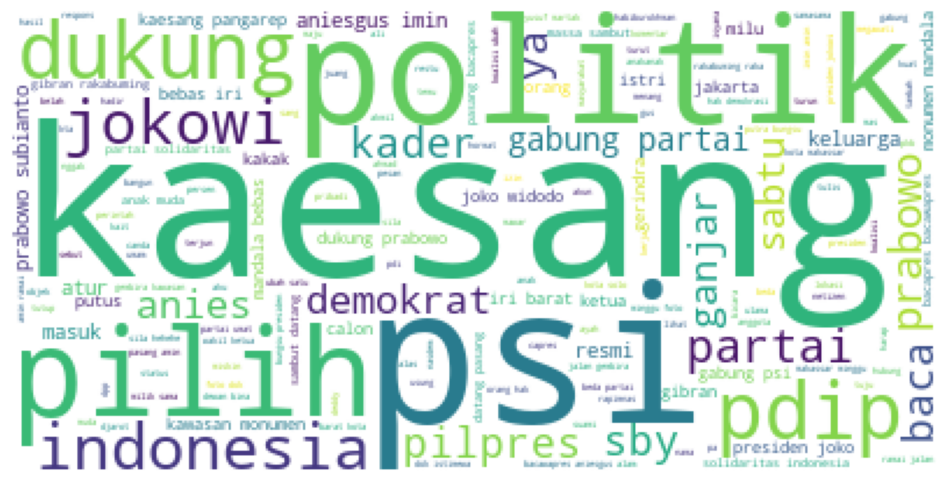

In [35]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# Combine all preprocessed text into a single string
text = ' '.join(df['content_preprocess'].tolist())

# Generate the wordcloud
wordcloud = WordCloud(background_color='white').generate(text)

# Plot the wordcloud
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

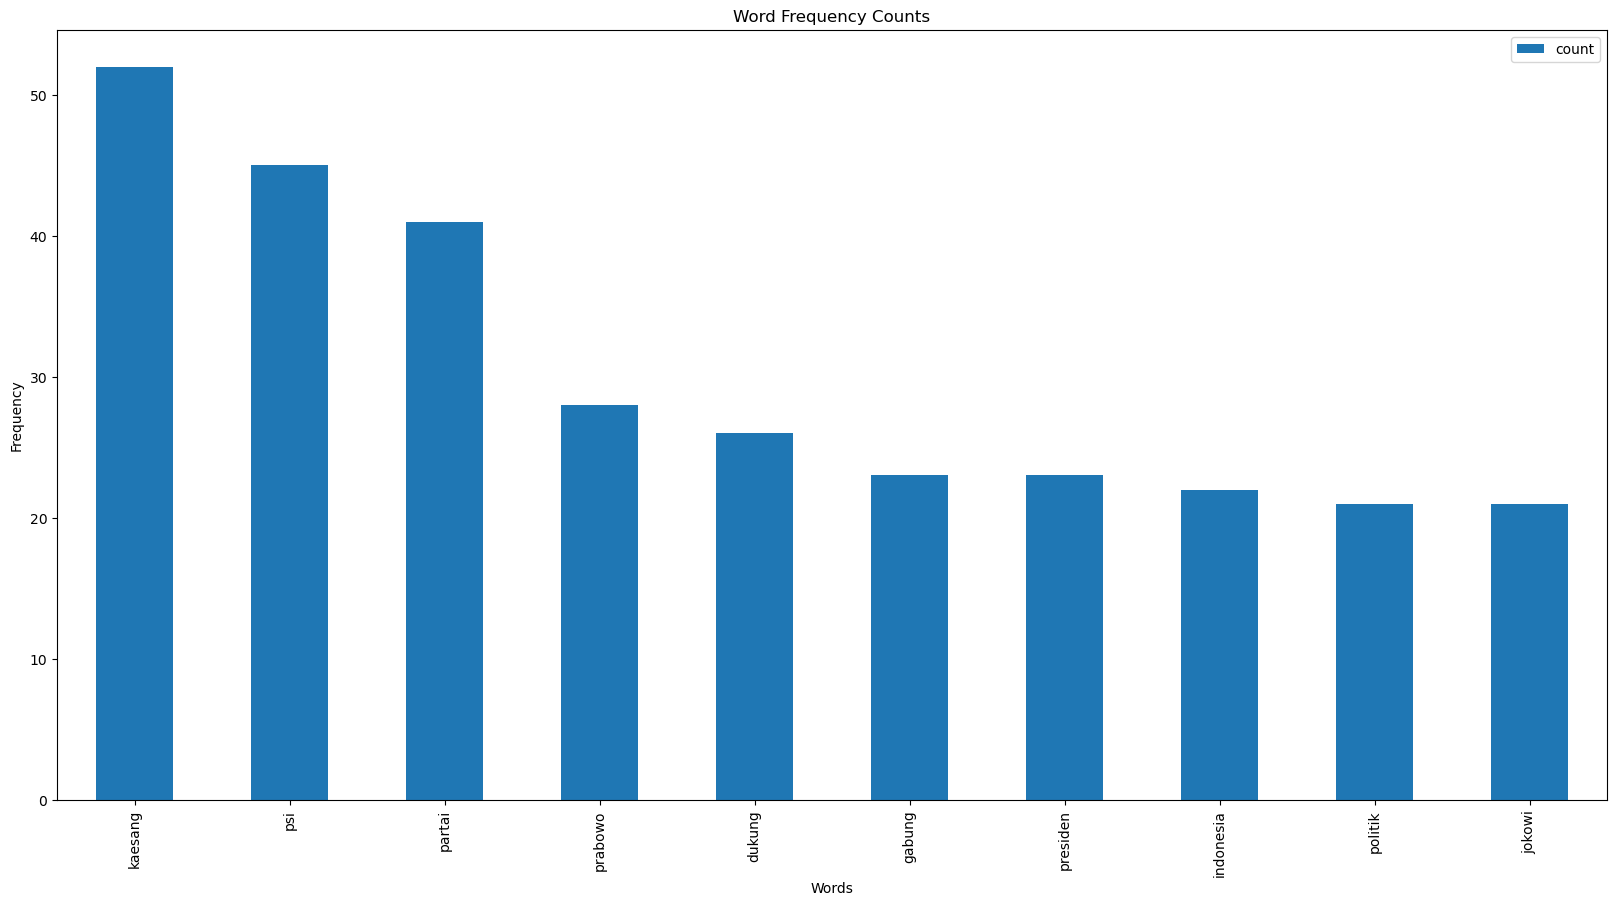

In [36]:
import matplotlib.pyplot as plt
from collections import Counter

# Combine all preprocessed text into a single string
text = ' '.join(df['content_preprocess'].tolist())

# Count the frequency of each word
word_counts = Counter(text.split())

# Get the 10 most common words
most_common_words = word_counts.most_common(10)

# Convert the word counts to a pandas dataframe
df_word_counts = pd.DataFrame.from_dict(dict(most_common_words), orient='index', columns=['count'])

# Sort the dataframe by count in descending order
df_word_counts = df_word_counts.sort_values(by='count', ascending=False)

# Plot the bar chart
df_word_counts.plot(kind='bar', figsize=(20,10))

# Set the title and axis labels
plt.title('Word Frequency Counts')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [37]:
# representasi vektor dengan VSM-TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)

# Fit and transform the content column of the DataFrame
X = tfidf_vectorizer.fit_transform(df["content"])

# Print the shape of the resulting matrix
print(X.shape)

# Set the number of clusters
k = 3
# Set the random seed
seed = 99

# Create a KMeans object with the specified number of clusters and random seed
km = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=seed)

# Fit the KMeans object to the data
km.fit(X)

# Get the cluster labels for each data point
C_km = km.predict(X)

# Print the first 10 cluster labels
print(C_km[:10])


(10, 311)
[0 1 2 1 0 0 1 1 1 1]


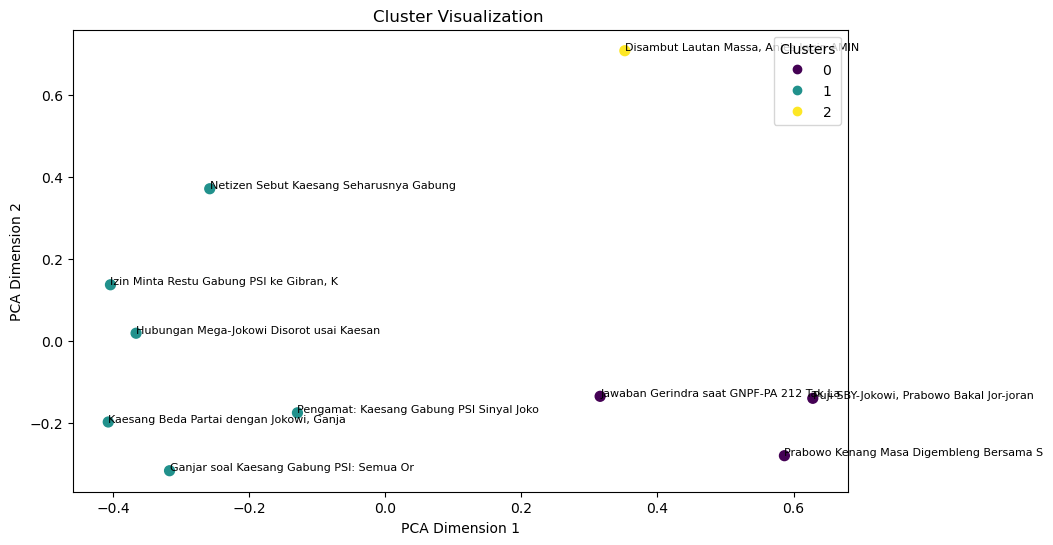

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Apply PCA to reduce the dimensionality of the TF-IDF matrix
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=C_km, cmap='viridis', marker='o', s=50)

# Annotate each point with its corresponding truncated text title
max_title_length = 40
for i, txt in enumerate(df["title"]):
    truncated_txt = txt[:max_title_length] if len(txt) > max_title_length else txt
    plt.annotate(truncated_txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8)
# Move the legend to a better position (e.g., upper right)
plt.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")

plt.title('Cluster Visualization ')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')

plt.show()


In [39]:
#validate using silhouette score
from sklearn.metrics import silhouette_score as siluet
C = [C_km]
for res in C:
    print(siluet(X, res), end=', ')
    

0.12488082411605009, 